In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

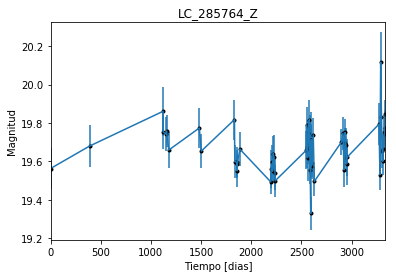

In [2]:
data = np.genfromtxt('LC_285764_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_285764_Z')
plt.savefig("LC_285764_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

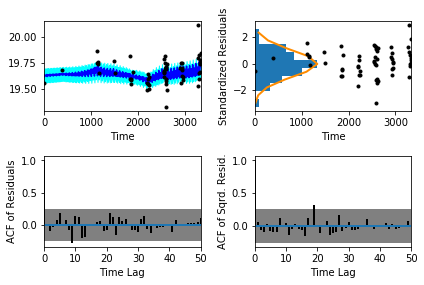

In [5]:
sample.assess_fit()

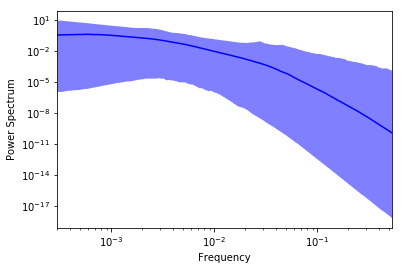

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

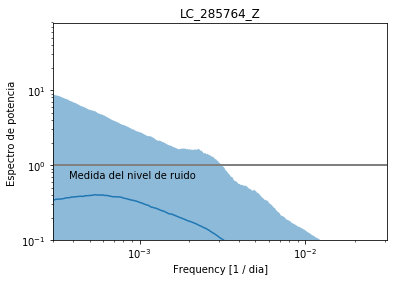

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_Z')

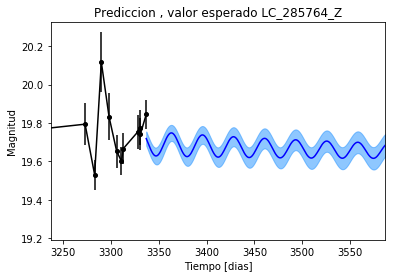

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_Z')

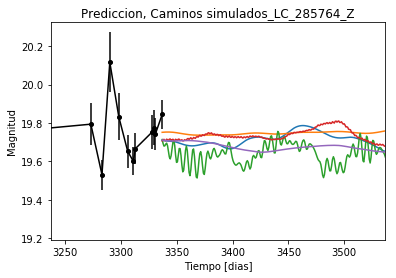

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


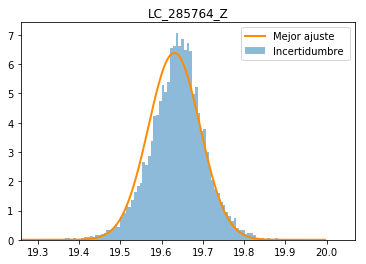

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_Z')
plt.savefig("Mejor_ajuste_LC_285764_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_Z')

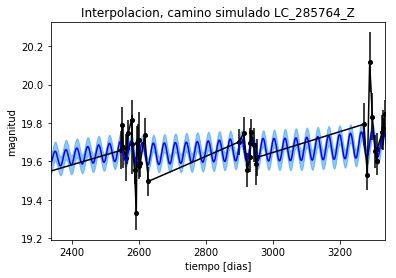

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_Z')

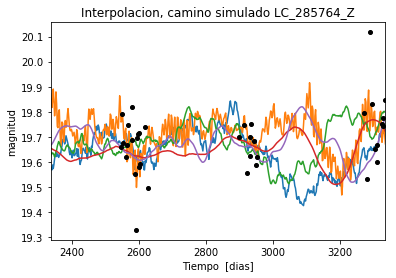

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1058.99211011
Median: 0.00806133041095
Standard deviation: 0.184121587141
68% credibility interval: [ 0.00083917  0.15527772]
95% credibility interval: [  3.49094039e-04   7.24483414e-01]
99% credibility interval: [  3.07381240e-04   9.73840060e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 765.856248883
Median: 0.00314892337902
Standard deviation: 0.0880454418578
68% credibility interval: [ 0.00057352  0.0383736 ]
95% credibility interval: [ 0.00032987  0.27572545]
99% credibility interval: [  3.04371216e-04   6.20231988e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 568.635313507
Median: 0.0210598889557
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1035.30792472
Median: 76.9655180822
Standard deviation: 1.57666155166
68% credibility interval: [ 75.18038996  78.04026142]
95% credibility interval: [ 72.71002808  78.83049594]
99% credibility interval: [ 70.80113529  79.53973517]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 841.847021753
Median: 0.639546035717
Standard deviation: 2.18982429828
68% credibility interval: [ 0.06824265  3.72741822]
95% credibility interval: [ 0.0163941   7.32395923]
99% credibility interval: [  0.0110343   10.08020845]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 382.581678704
Median: 0.552264264226
Standard deviation: 11.0998749147
68% credibility interval: [  0.02376018  11.36286133]
95% credibility interval: [  8.8452444

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1499.60034117
Median: 4.12861940241e-13
Standard deviation: 1.10767514691e+83
68% credibility interval: [  4.99523340e-67   1.46830957e+36]
95% credibility interval: [  1.03563838e-146   2.80943505e+070]
99% credibility interval: [  3.74259721e-164   6.96801716e+080]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1948.55297693
Median: 19.6571870815
Standard deviation: 0.0320471757568
68% credibility interval: [ 19.63335469  19.68339894]
95% credibility interval: [ 19.59729582  19.72482412]
99% credibility interval: [ 19.5565032   19.76430269]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 463.766173363
Median: 0.0311007235871
Standard deviation: 0.270362836404
68% credibility interval: [ 0.          0.45587004]
95% credibility interval: [ 0.          0.95387554]
99% credibility interval: [ 0.          1.04760946]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 463.766173363
Median: 0.0311007235871
Standard deviation: 0.270362836404
68% credibility interval: [ 0.          0.45587004]
95% credibility interval: [ 0.          0.95387554]
99% credibility interval: [ 0.          1.04760946]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 208.282379242
Median: 0.0
Standard deviation: 0.061439529436
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1035.30792472
Median: 76.9655180822
Standard deviation: 1.57666155166
68% credibility interval: [ 75.18038996  78.04026142]
95% credibility interval: [ 72.71002808  78.83049594]
99% credibility interval: [ 70.80113529  79.53973517]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2431.99987325
Median: 0.00442299983384
Standard deviation: 0.00555206725313
68% credibility interval: [ 0.00198911  0.00919834]
95% credibility interval: [ 0.00053107  0.01913708]
99% credibility interval: [  5.40526988e-05   3.39987963e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1928.89728948
Median: 1.09678917217
Standard deviation: 0.177534340643
68% credibility interval: [ 0.93539807  1.27875752]
95% credibility interval: [ 0.80986122  1.50849354]
99% credibility interval: [ 0.7343084   1.65487363]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 858.164639784
Median: 8.57031816857e-06
Standard deviation: 0.226646646934
68% credibility interval: [  3.14265502e-40   5.25192959e-03]
95% credibility interval: [  7.53849474e-74   2.77993924e-01]
99% credibility interval: [  8.80344757e-85   1.47869882e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1058.99211011
Median: (-0.0506508327944-0.0922481798249j)
Standard deviation: 2.05525308115
68% credibility interval: [-0.97563868+0.j        -0.00527266-0.3967761j]
95% credibility interval: [ -4.55206354e+00+0.j          -2.19342254e-03-0.17186297j]
99% credibility interval: [ -6.11881756e+00+0.j          -1.93133329e-03-0.00531718j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 765.856248883
Median: (-0.0197852691085+0j)
Standard deviation: 1.78654795602
68% credibility interval: [-0.24110846+3.87179413j -0.00360351+0.01606438j]
95% credibility interval: [-1.73243409+4.27559475j -0.00207265+2.28658915j]
99% credibility interval: [ -3.89703251e+00+4.31047179j  -1.91242075e-03+3.46530617j]
Posterior summary for para